In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
file_name = r'C:\Users\Erik\OneDrive\Desktop\Portfolio Stuff\fortune1000_2024.csv'
df = pd.read_csv(file_name)
pd.set_option('display.max_rows', 1001)
pd.set_option('display.max_columns', 32)
df.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,Dropped_in_Rank,Newcomer_to_the_Fortune500,Global500,Worlds_Most_Admired_Companies,Best_Companies_to_Work_For,Number_of_employees,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0,no,no,no,yes,yes,yes,2100000,484852.8,648125.0,6.0,15511.0,32.8,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,8/5/2024
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0,no,no,no,yes,yes,no,1525000,1873675.8,574785.0,11.8,30425.0,NaN,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,8/5/2024
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1,yes,no,no,yes,yes,no,161000,2647973.8,383285.0,-2.8,96995.0,-2.8,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,8/5/2024
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1,yes,no,no,yes,yes,no,440000,456080.8,371622.0,14.6,22381.0,11.2,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,8/5/2024
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2,yes,no,no,yes,yes,no,396500,908919.7,364482.0,20.7,96223.0,NaN,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,8/5/2024


### Cleaning Data and First Impressions
Will be reducing the amount of columns, removing the ones we will not be working on.

In [4]:
df_updated = df[['Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO', 'FemaleCEO', 'Growth_in_Jobs', 'Global500', 'Best_Companies_to_Work_For', 'Number_of_employees', 'MarketCap_Updated_M', 'Revenues_M', 'Profits_M', 'Assets_M', 'CompanyType']]
df_updated.head()

,Company,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Global500,Best_Companies_to_Work_For,Number_of_employees,MarketCap_Updated_M,Revenues_M,Profits_M,Assets_M,CompanyType
0,Walmart,Retailing,General Merchandisers,yes,no,no,no,yes,yes,2100000,559911.0,648125.0,15511.0,252399.0,Public
1,Amazon,Retailing,Internet Services and Retailing,yes,no,no,no,yes,no,1525000,2005565.0,574785.0,30425.0,527854.0,Public
2,Apple,Technology,"Computers, Office Equipment",yes,no,no,no,yes,no,161000,3594309.0,383285.0,96995.0,352583.0,Public
3,UnitedHealth Group,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,yes,no,440000,474339.0,371622.0,22381.0,273720.0,Public
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,yes,no,396500,937028.0,364482.0,96223.0,1069978.0,Public


In [5]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1000 non-null   object 
 1   Sector                      1000 non-null   object 
 2   Industry                    1000 non-null   object 
 3   Profitable                  1000 non-null   object 
 4   Founder_is_CEO              1000 non-null   object 
 5   FemaleCEO                   1000 non-null   object 
 6   Growth_in_Jobs              1000 non-null   object 
 7   Global500                   1000 non-null   object 
 8   Best_Companies_to_Work_For  1000 non-null   object 
 9   Number_of_employees         1000 non-null   int64  
 10  MarketCap_Updated_M         963 non-null    float64
 11  Revenues_M                  1000 non-null   float64
 12  Profits_M                   998 non-null    float64
 13  Assets_M                    1000 n

Not many columns have missing data, only MarketCap with 37 and Profits_M with 2.

In [6]:
df_updated.describe()

,Number_of_employees,MarketCap_Updated_M,Revenues_M,Profits_M,Assets_M
count,1.000000e+03,9.630000e+02,1000.000000,998.000000,1.000000e+03
mean,3.661176e+04,5.397445e+04,20965.064200,1867.165832,6.375722e+04
std,9.990100e+04,2.292664e+05,48589.311028,6649.887738,2.721551e+05
min,2.800000e+01,1.000000e+00,2489.000000,-10298.000000,3.613000e+02
25%,6.718000e+03,4.832500e+03,3968.375000,157.575000,5.342950e+03
50%,1.400000e+04,1.237900e+04,7090.500000,542.600000,1.284765e+04
75%,3.074075e+04,3.773550e+04,16207.650000,1401.050000,3.758012e+04
max,2.100000e+06,3.594309e+06,648125.000000,96995.000000,4.325437e+06


In [7]:
numeric_columns = df_updated[['MarketCap_Updated_M', 'Revenues_M', 'Profits_M', 'Assets_M']]
correlation_matrix = numeric_columns.corr()
correlation_matrix

,MarketCap_Updated_M,Revenues_M,Profits_M,Assets_M
MarketCap_Updated_M,1.000000,0.540792,0.808793,0.172525
Revenues_M,0.540792,1.000000,0.658038,0.380842
Profits_M,0.808793,0.658038,1.000000,0.395323
Assets_M,0.172525,0.380842,0.395323,1.000000


### Visualizations

<Figure size 720x576 with 0 Axes>

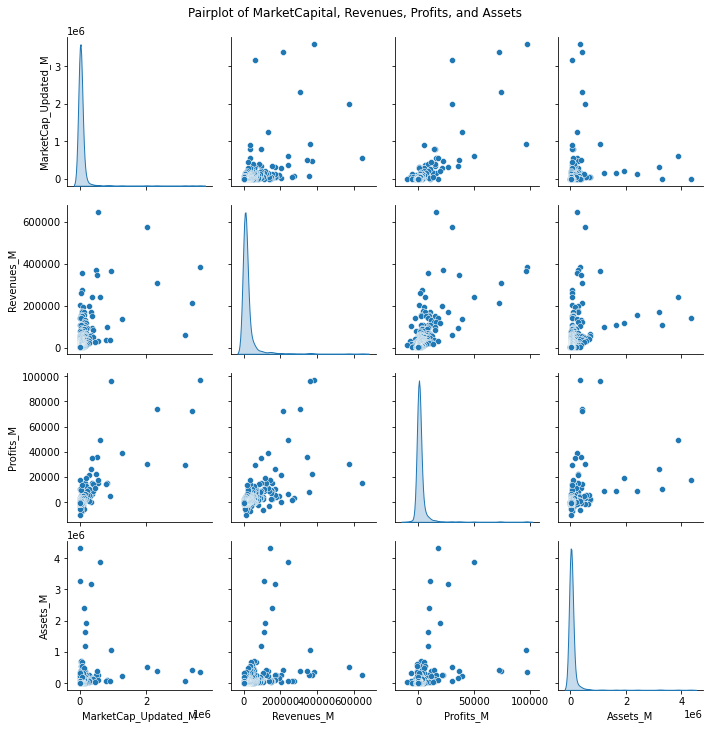

In [8]:
plt.figure(figsize = (10,8))
sns.pairplot(df_updated[['MarketCap_Updated_M', 'Revenues_M', 'Profits_M', 'Assets_M']], diag_kind='kde', kind='scatter')
plt.suptitle('Pairplot of MarketCapital, Revenues, Profits, and Assets', y=1.01)
plt.show()

Highest Correlation appear between Profits and Market Capital with 0.808 correlation. Market Capital and Revenue is second with 0.54 correlation. 

#### Below is the distribution of the Sectors in the Fortune 1000 companies

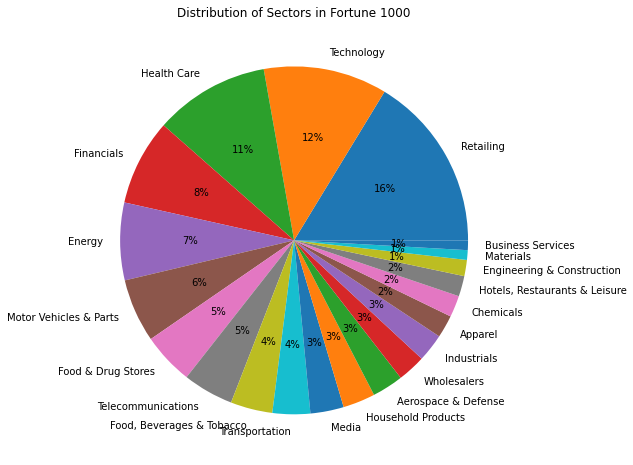

In [10]:
plt.figure(figsize=(10,8))
plt.pie(df_updated['Sector'].value_counts(), labels=df_updated['Sector'].unique(), autopct='%.0f%%')
plt.title('Distribution of Sectors in Fortune 1000')
plt.show()

47% of companies in the Fortune 1000 belong in the Retail, Technology, Health Care, or Financial fields. Interesting to see Industrials and Apparels only make up 5%. Would love to see previous years of the Fortune 1000 and see how time periods affect the distribution of sectors.

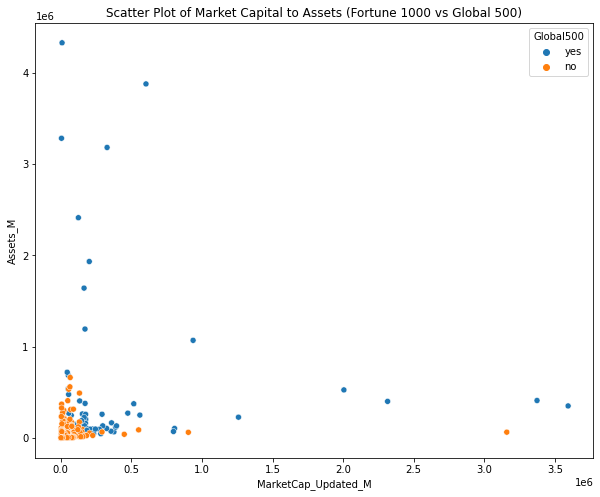

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_updated, x = 'MarketCap_Updated_M', y = 'Assets_M', hue = 'Global500')
plt.title('Scatter Plot of Market Capital to Assets (Fortune 1000 vs Global 500)')
plt.show()

In [17]:
mark_cap = df_updated[(df_updated['MarketCap_Updated_M'] > 3000000) & (df_updated['Assets_M'] < 100000) & (df_updated['Global500'] == 'no')]
mark_cap

,Company,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Global500,Best_Companies_to_Work_For,Number_of_employees,MarketCap_Updated_M,Revenues_M,Profits_M,Assets_M,CompanyType
64,Nvidia,Technology,Semiconductors and Other Electronic Components,yes,yes,no,yes,no,yes,29600,3159624.0,60922.0,29760.0,65728.0,Public


The Scatterplot shows the Market Capital to Assets of each company. Nvidia appears as the outlier that's Market Capital is above 3 Million but is not in the Global 500. Researching about Nvidia would help understand why it has a top 3 Market Capital but is not in the Global 500. One reason would be the low amount of Assets. 

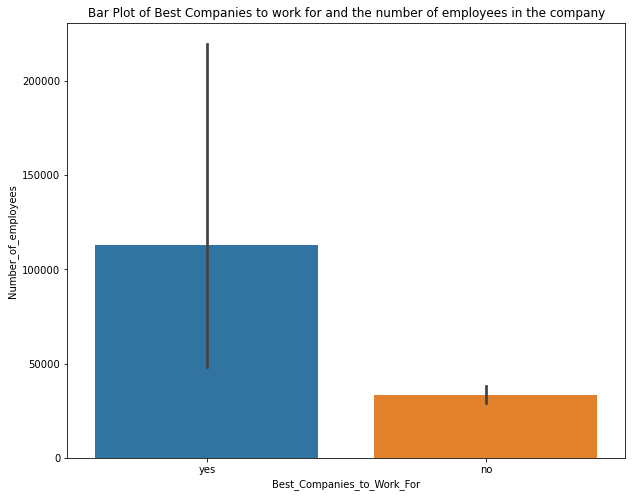

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_updated, x = 'Best_Companies_to_Work_For', y = 'Number_of_employees')
plt.title('Bar Plot of Best Companies to work for and the number of employees in the company')
plt.show()

The companies that are considered "Best Conmpanies to work for" generally have a large amount of employees compared to companies that aren't considered a good company to work for. One reason would be the more employees a company has, the more social and less work a single employee would be, causing a positive view of the company. 

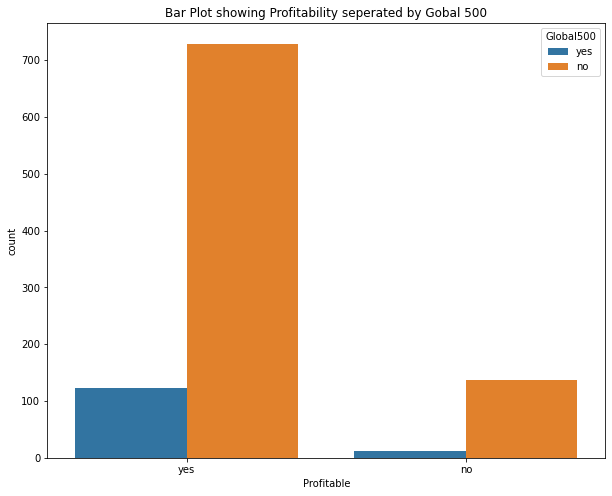

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_updated, x = 'Profitable', hue = 'Global500')
plt.title('Bar Plot showing Profitability seperated by Global 500')
plt.show()

The bar plot shows that majority of the Fortune 1000 are profitable. Around 15% aren't profitable and whats even more interesting, the table under shows the 12 companies that are not profitable and are on the Global 500. Finance also appears to be a common sector on that stat being 5 of the 12 companies. 

In [21]:
not_profit_not_global = df_updated[(df_updated['Profitable'] == 'no') & (df_updated['Global500'] == 'yes')]
not_profit_not_global

,Company,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Global500,Best_Companies_to_Work_For,Number_of_employees,MarketCap_Updated_M,Revenues_M,Profits_M,Assets_M,CompanyType
27,Walgreens Boots Alliance,Food & Drug Stores,Food & Drug Stores,no,no,no,yes,yes,no,268500,10100.0,139081.0,-3080.0,96628.0,Public
38,State Farm Insurance,Financials,Insurance: Property and Casualty (Mutual),no,no,no,yes,yes,no,65054,NaN,104198.6,-6272.3,339484.7,Private
51,Boeing,Aerospace & Defense,Aerospace & Defense,no,no,no,yes,yes,no,171000,109953.0,77794.0,-2222.0,137012.0,Public
72,Allstate,Financials,Insurance: Property and Casualty (Stock),no,no,no,no,yes,no,53200,44050.0,57094.0,-188.0,103362.0,Public
74,Nationwide,Financials,Insurance: Property and Casualty (Mutual),no,no,no,no,yes,yes,24118,NaN,54609.4,-45.2,290615.0,Private
84,Tyson Foods,"Food, Beverages & Tobacco",Food Production,no,no,no,no,yes,no,139000,20461.0,52881.0,-648.0,36251.0,Public
95,TIAA,Financials,"Insurance: Life, Health (Mutual)",no,no,yes,no,yes,no,16023,NaN,45734.8,-1408.9,629369.9,Private
101,Massachusetts Mutual Life Insurance,Financials,"Insurance: Life, Health (Mutual)",no,no,no,yes,yes,no,11323,NaN,42641.4,-771.6,397895.0,Private
105,Warner Bros. Discovery,Media,Entertainment,no,no,no,no,yes,no,35300,18181.0,41321.0,-3126.0,122757.0,Public
133,3M,Chemicals,Chemicals,no,no,no,no,yes,no,85000,56841.0,32681.0,-6995.0,50580.0,Public


### Conclusion

Majority of our findings make sense. Like the fact that companies who are more well liked, have more employees. Retailing is no suprise as being the number 1 sector for these companies as you have Walmart and Amazon lead the Fortune 1000. It is suprising how Nvidia, despite having a top 3 Capital Market in the U.S., is not considered a Global 500. Not every Fortune 1000 company is profitable and 12 are even classified as Global 500. I would hypothesis that these companies had previously thrived but more recently have taken a hit and have started to slowly become less and less profitable. Would consider researching these companies. Would also be careful with the Financial companies as they make up 42% of not profitable Global 500. 